<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [8]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [9]:
# A: 
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [39]:
# A:
diction = {'X': X, 'Y': Y}
pre_df = pd.DataFrame(data = diction)

In [40]:
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [41]:
# A:
X_2 = [a + 10 for a in X]
Y_2 = [a + 3 for a in Y]
diction = {'X': X_2, 'Y': Y_2}

new_data = pd.DataFrame(data = diction)

In [42]:
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [43]:
# A:

df = pd.concat([pre_df, new_data], sort = False, ignore_index = True)

In [44]:
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

Text(0.5, 1.0, 'X vs Y')

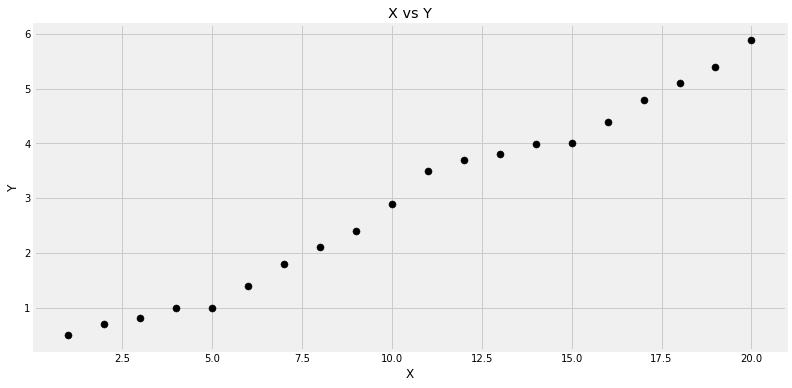

In [18]:
# A:

CM = df.plot(kind = 'scatter', x = 'X', y = 'Y', figsize = (12,6), s = 50, c = 'black')
CM.set_title('X vs Y')

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [19]:
# A:

endog = df['Y']
exog = sm.add_constant(df['X'])
model = sm.OLS(endog,exog)
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.76e-18
Time:                        15:37:31   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.3

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [8]:
# A: .986

### What is the p-value for your X?

In [9]:
# A: 0 

### What is the intercept?

In [10]:
# A: -.0857

### Using the above, write the equation for our model

In [11]:
# A: y = (.29x)-.0857

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [12]:
# A: when x = 20, y = 5.7143

In [13]:
# A: when x = 21, y = 6.0043

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [24]:
# A:

import statsmodels.formula.api as smf


preresults = smf.ols('Y ~ X',df).fit()
df['Ypred'] = preresults.predict()

In [25]:
preresults.predict(pd.DataFrame({'X':[20,21]}))

0    5.713714
1    6.003684
dtype: float64

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [26]:
# A:

from sklearn import metrics


print('MSE:', metrics.mean_squared_error(df['Y'], df['Ypred']))
print( metrics.mean_squared_error(df['Y'], df['Ypred'])*20 )

MSE: 0.03958396992481204
0.7916793984962409


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

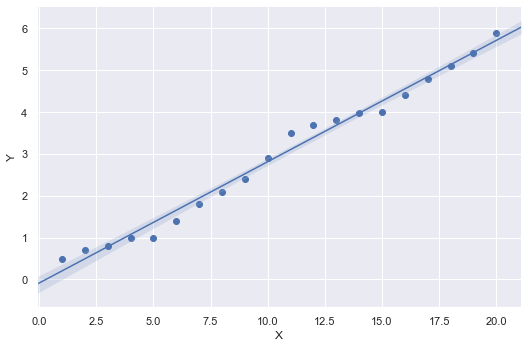

In [30]:
# A:

sns.set(rc={"lines.linewidth": 1.0})
sns.lmplot(x='X', y='Y', data=df, aspect=1.5, scatter_kws={'alpha':1.0});

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [31]:
# A:
import sklearn
poly = sklearn.preprocessing.PolynomialFeatures(degree = 5)
X_reshape = df.X.values.reshape(-1,1)
poly_feats = poly.fit_transform(X_reshape)

In [33]:
# A:
poly_X = pd.DataFrame(data = poly_feats)
poly_X

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


In [34]:
# A:
pdf = pd.merge(df[['Y']], poly_X, left_index=True, right_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.40,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.80,1.0,7.0,49.0,343.0,2401.0,16807.0
7,2.10,1.0,8.0,64.0,512.0,4096.0,32768.0
8,2.40,1.0,9.0,81.0,729.0,6561.0,59049.0
9,2.90,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Using statsmodels as before, fit this new model and save it as poly_results

In [35]:
# A:

endog = pdf['Y']
model = sm.OLS(endog,poly_feats)
results = model.fit()

print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     572.4
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.15e-15
Time:                        16:00:11   Log-Likelihood:                 14.451
No. Observations:                  20   AIC:                            -16.90
Df Residuals:                      14   BIC:                            -10.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5702      0.312      1.827      0.0

### Print out the model's predictions and save them as poly_yhat

In [36]:
# A:
poly_yhat = results.predict(poly_feats)
Ypred_poly = pd.Series(poly_yhat)
df['Ypred_poly'] = Ypred_poly
df

,X,Y,Ypred,Ypred_poly
0,1,0.50,0.204286,0.574523
1,2,0.70,0.494256,0.623835
2,3,0.80,0.784226,0.733296
3,4,0.99,1.074195,0.908667
4,5,1.00,1.364165,1.147914
5,6,1.40,1.654135,1.442831
6,7,1.80,1.944105,1.780648
7,8,2.10,2.234075,2.145656
8,9,2.40,2.524045,2.520816
9,10,2.90,2.814015,2.889383


### Calculate the SSE

In [38]:
# A: 
print('MSE:', metrics.mean_squared_error(df['Y'], poly_yhat))
print('SSE:', metrics.mean_squared_error(df['Y'], poly_yhat)*20 )

MSE: 0.01380152253637476
SSE: 0.2760304507274952


### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: